### Antoine Levrier
*PHEIGES, all-cell-free phage synthesis and selection from engineered genomes*

# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
plt.rcParams['figure.dpi'] = 100                                                                                                                                                                                                                                                                                                                                                                                                                 
plt.rcParams['font.sans-serif'] = 'Arial'

# Plot for Figure 2.d

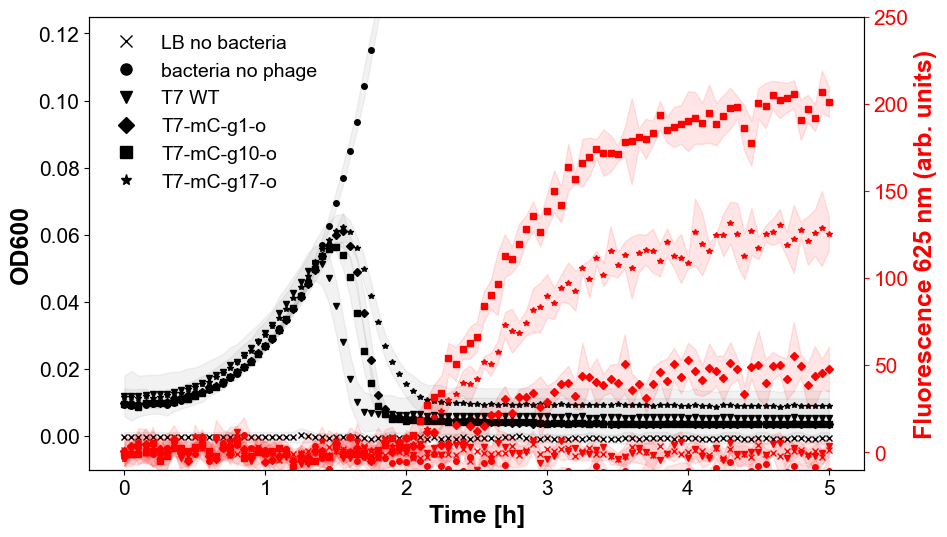

In [3]:
#plot mcherry gp 1, gp10 and gp17 vs WT

#set markers
marker_OD= ['kx', 'ko', 'kv', 'kD', 'ks', 'k*']
marker_fluo= ['rx', 'ro', 'rv', 'rD', 'rs', 'r*']

#import data
data = pd.ExcelFile('data-2d.xlsx')
OD = data.parse('OD')
fluo = data.parse('fluo')

#asign experimental labels to data
labels = ["LB no bacteria", "bacteria no phage", "T7 WT", "T7-mC-g1-o", "T7-mC-g10-o", "T7-mC-g17-o"]
column = ['E11', 'E12', 'G11', 'G12', 'E9', 'E10', 'G9', 'G10', 'A9', 'A10', 'A11', 'A12', 'B5', 'B6', 'B7', 'B8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4']


#Def a time line from 0 to 5 hours
time = np.linspace(0, 5, 101)
condition= len(column)

#create the plot and set primary axis for OD data
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

#plot OD mean and std
for x in range (0, 24, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

#adjust plot limits
ax1.set_ylim([-0.01, 0.125])
ax1.tick_params(axis='y', labelsize=15)

#insert a legend
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

#create a secondary axis for fluorescence data
ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

#plot fluorescence mean and std
for x in range (0, 24, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

#adjust the plots
ax2.set_ylim([-10, 250])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#save figure and display
#plt.savefig("Fig 2d.svg", format='svg')
plt.show()

# Plot for Figure 6.b

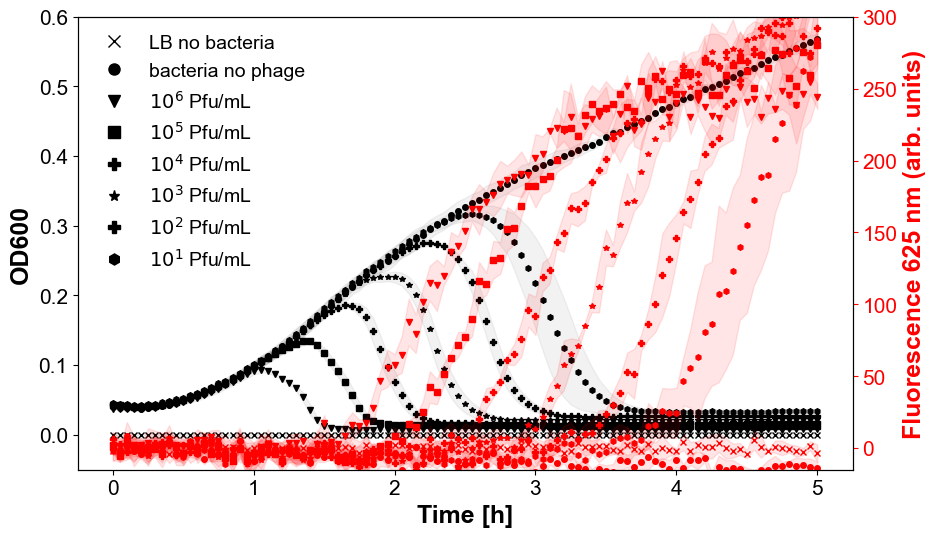

In [4]:
#set markers
marker_OD= ['kx', 'ko', 'kv', 'ks', 'kP', 'k*', 'kP', 'kh']
marker_fluo= ['rx', 'ro', 'rv', 'rs', 'rP', 'r*', 'rP', 'rh']

#import data
data = pd.ExcelFile('data-6b-S31.xlsx')
OD = data.parse('OD_comp')
fluo = data.parse('fluo_comp')

#asign experimental labels to data
labels = ["LB no bacteria", "bacteria no phage", r'$10^{6}$ Pfu/mL', r'$10^{5}$ Pfu/mL', r'$10^{4}$ Pfu/mL', r'$10^{3}$ Pfu/mL', r'$10^{2}$ Pfu/mL', r'$10^{1}$ Pfu/mL']
column = ['A12', 'B12', 'E12', 'F12', 'A11', 'B11', 'C11', 'D11', 'A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2', 'A3', 'B3', 'C3', 'D3', 'A4', 'B4', 'C4', 'D4', 'A5', 'B5', 'C5', 'D5', 'A6', 'B6', 'C6','D6']

#Def a time line from 0 to 5 hours
time = np.linspace(0, 5, 101)
condition= len(column)

#create the plot and set primary axis for OD data
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

#plot OD mean and std
max_od=[]
time_od=[]
for x in range (0, 32, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    maxi=max(mean_OD)
    max_od.append(maxi)
    time_od.append(mean_OD.idxmax())
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

#adjust plot limits
ax1.set_ylim([-0.05, 0.6])
ax1.tick_params(axis='y', labelsize=15)

#insert a legend
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

#create a secondary axis for fluorescence data
ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

#plot fluorescence mean and std
for x in range (0, 32, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

#adjust plot limits
ax2.set_ylim([-15, 300])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#save figure and display
#plt.savefig("Fig 6b.svg", format='svg')
plt.show()

# Plot Supplementary Figures

## Supplementary Figure 8

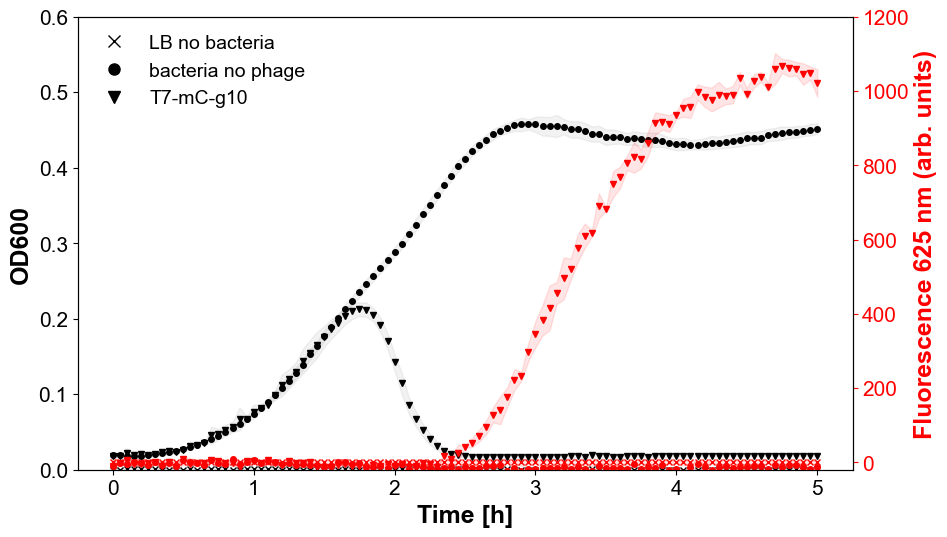

In [5]:
marker_OD= ['kx', 'ko', 'kv']
marker_fluo= ['rx', 'ro', 'rv']

data = pd.ExcelFile('data-S8.xlsx')
OD = data.parse('OD')
fluo = data.parse('fluo')
labels = ["LB no bacteria", "bacteria no phage", 'T7-mC-g10']
column = ['F11', 'G11', 'H11', 'F10', 'G10', 'H10', 'E6', 'F6', 'G6']

#Def a time line from 0 to 5 hours
time = np.linspace(0, 5, 101)
condition= len(column)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

for x in range (0, 9, 3):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    plt.plot(time, mean_OD, marker_OD[int(x/3)], ms=4, label=labels[int(x/3)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

ax1.set_ylim([0, 0.6])
ax1.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

for x in range (0, 9, 3):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/3)], ms=4, label=labels[int(x/3)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

ax2.set_ylim([-20, 1200])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#plt.savefig("Fig S8.png", format='png')
plt.show()

## Plots Supplementary Figure 10

### Supplementary Figure 10.a

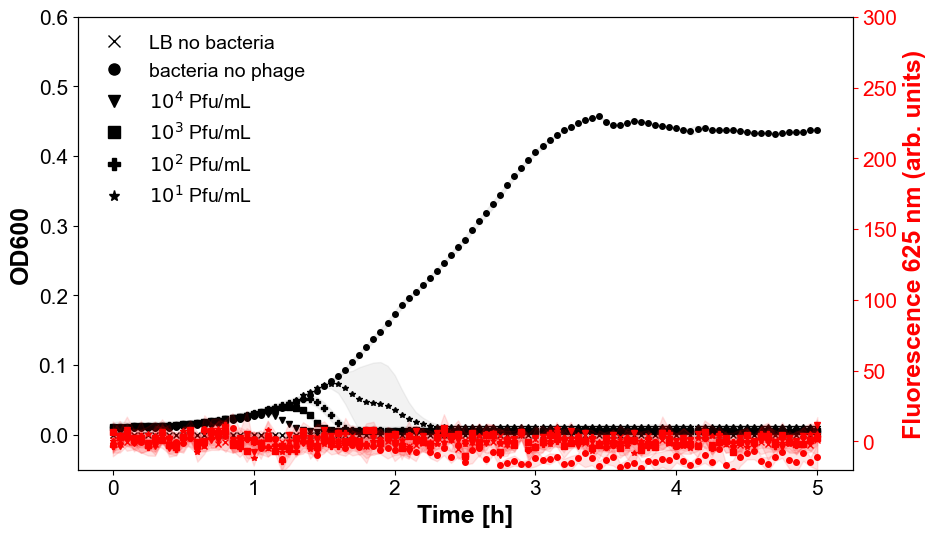

In [6]:
marker_OD= ['kx', 'ko', 'kv', 'ks', 'kP', 'k*']
marker_fluo= ['rx', 'ro', 'rv', 'rs', 'rP', 'r*']

data = pd.ExcelFile('data-S10.xlsx')
OD = data.parse('odwt')
fluo = data.parse('fluowt')

labels = ["LB no bacteria", "bacteria no phage", r'$10^{4}$ Pfu/mL', r'$10^{3}$ Pfu/mL', r'$10^{2}$ Pfu/mL', r'$10^{1}$ Pfu/mL']
column = ['E11', 'E12', 'G11', 'G12', 'E9', 'E10', 'G9', 'G10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'E1', 'E2', 'E3', 'E4']

#Def a time line from 1 to 5 hours
time = np.linspace(0, 5, 101)
condition= len(column)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

for x in range (0, 24, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

ax1.set_ylim([-0.05, 0.6])
ax1.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

for x in range (0, 24, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

ax2.set_ylim([-20, 300])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#plt.savefig("Fig S10.a.png", format='png')
plt.show()

### Supplementary Figure 10.b

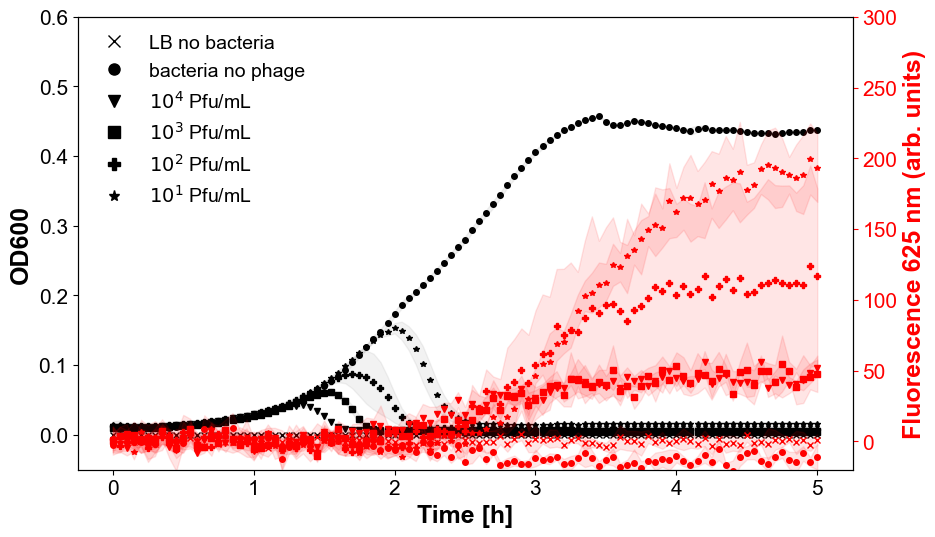

In [7]:
marker_OD= ['kx', 'ko', 'kv', 'ks', 'kP', 'k*']
marker_fluo= ['rx', 'ro', 'rv', 'rs', 'rP', 'r*']

data = pd.ExcelFile('data-S10.xlsx')
OD = data.parse('odgp1')
fluo = data.parse('fluogp1')
labels = ["LB no bacteria", "bacteria no phage", r'$10^{4}$ Pfu/mL', r'$10^{3}$ Pfu/mL', r'$10^{2}$ Pfu/mL', r'$10^{1}$ Pfu/mL']
column = ['E11', 'E12', 'G11', 'G12', 'E9', 'E10', 'G9', 'G10', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'F1', 'F2', 'F3', 'F4']

time = np.linspace(0, 5, 101)
condition= len(column)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

for x in range (0, 24, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

ax1.set_ylim([-0.05, 0.6])
ax1.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

for x in range (0, 24, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

ax2.set_ylim([-20, 300])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#plt.savefig("Fig S10-b.png", format='png')
plt.show()

### Supplementary Figure 10.c

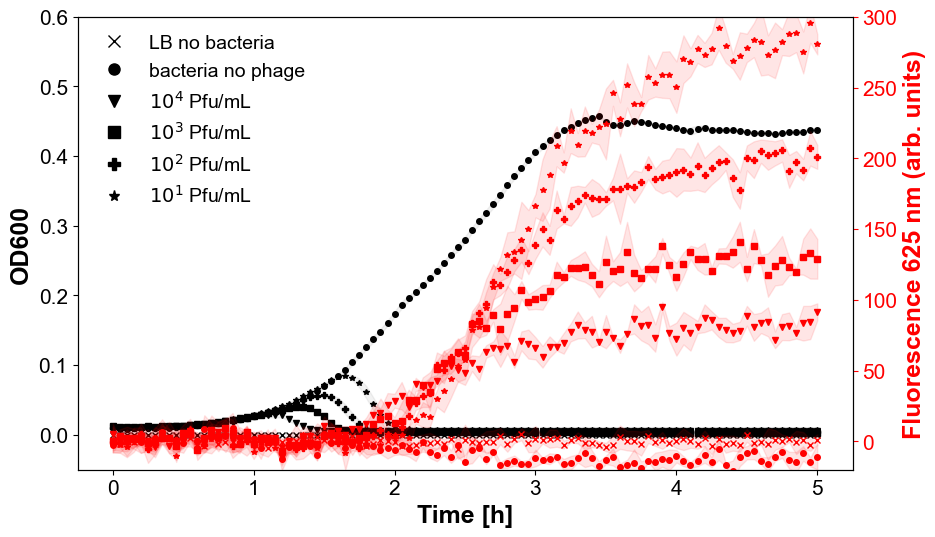

In [8]:
marker_OD= ['kx', 'ko', 'kv', 'ks', 'kP', 'k*']
marker_fluo= ['rx', 'ro', 'rv', 'rs', 'rP', 'r*']

data = pd.ExcelFile('data-S10.xlsx')
OD = data.parse('odgp10')
fluo = data.parse('fluogp10')
labels = ["LB no bacteria", "bacteria no phage", r'$10^{4}$ Pfu/mL', r'$10^{3}$ Pfu/mL', r'$10^{2}$ Pfu/mL', r'$10^{1}$ Pfu/mL']
column = ['E11', 'E12', 'G11', 'G12', 'E9', 'E10', 'G9', 'G10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'G1', 'G2', 'G3', 'G4']

time = np.linspace(0, 5, 101)
condition= len(column)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

for x in range (0, 24, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

ax1.set_ylim([-0.05, 0.6])
ax1.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

for x in range (0, 24, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

ax2.set_ylim([-20, 300])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#plt.savefig("Fig S10-c.png", format='png')
plt.show()

### Supplementary Figure 10.d

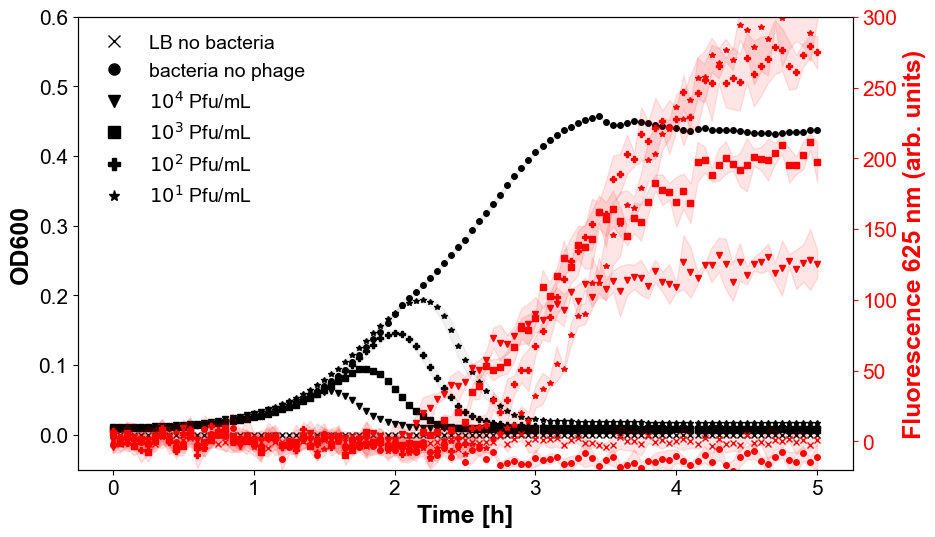

In [9]:
marker_OD= ['kx', 'ko', 'kv', 'ks', 'kP', 'k*']
marker_fluo= ['rx', 'ro', 'rv', 'rs', 'rP', 'r*']

data = pd.ExcelFile('data-S10.xlsx')
OD = data.parse('odgp17')
fluo = data.parse('fluogp17')

labels = ["LB no bacteria", "bacteria no phage", r'$10^{4}$ Pfu/mL', r'$10^{3}$ Pfu/mL', r'$10^{2}$ Pfu/mL', r'$10^{1}$ Pfu/mL']
column = ['E11', 'E12', 'G11', 'G12', 'E9', 'E10', 'G9', 'G10', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'H1', 'H2', 'H3', 'H4']

time = np.linspace(0, 5, 101)
condition= len(column)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

for x in range (0, 24, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')

ax1.set_ylim([-0.05, 0.6])
ax1.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

for x in range (0, 24, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

ax2.set_ylim([-20, 300])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#plt.savefig("Fig S10-d.png", format='png')
plt.show()

## Supplementary Figure 31

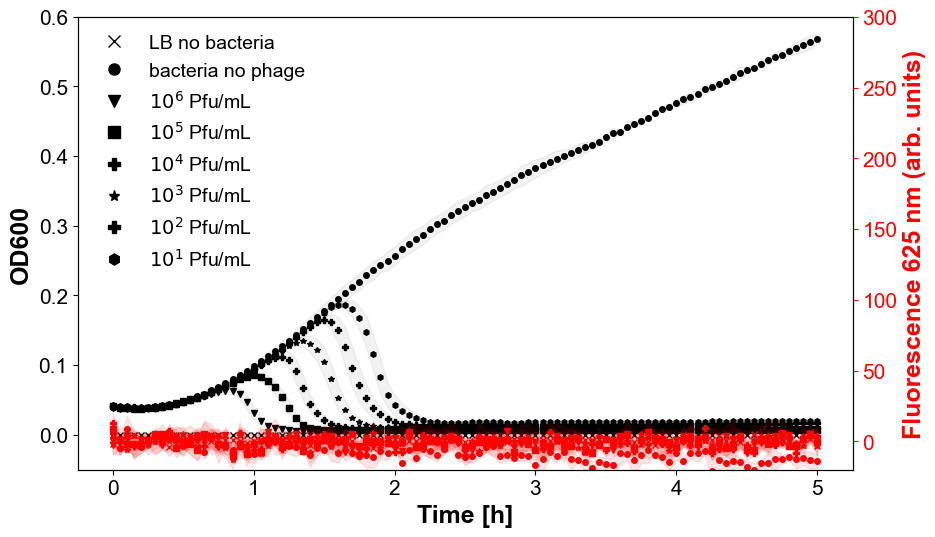

In [10]:
#blancked_compile_T7ReLPS_forplot
marker_OD= ['kx', 'ko', 'kv', 'ks', 'kP', 'k*', 'kP', 'kh']
marker_fluo= ['rx', 'ro', 'rv', 'rs', 'rP', 'r*', 'rP', 'rh']

data = pd.ExcelFile('data-6b-S31.xlsx')
OD = data.parse('OD_T7Re')
fluo = data.parse('fluo_T7Re')
labels = ["LB no bacteria", "bacteria no phage", r'$10^{6}$ Pfu/mL', r'$10^{5}$ Pfu/mL', r'$10^{4}$ Pfu/mL', r'$10^{3}$ Pfu/mL', r'$10^{2}$ Pfu/mL', r'$10^{1}$ Pfu/mL']
column = ['A12', 'B12', 'E12', 'F12', 'A11', 'B11', 'C11', 'D11','E1', 'F1', 'G1', 'H1', 'E2', 'F2', 'G2', 'H2', 'E3', 'F3', 'G3', 'H3', 'E4', 'F4', 'G4', 'H4', 'E5', 'F5', 'G5', 'H5', 'E6', 'F6', 'G6', 'H6']

time = np.linspace(0, 5, 101)
condition= len(column)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Time [h]', fontsize=18, fontweight ='bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('OD600', fontsize=18, fontweight ='bold')

max_od=[]
time_od=[]

for x in range (0, 32, 4):
    OD_1 = OD.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_OD = OD_1.std(axis=1)
    mean_OD = OD_1.mean(axis=1)
    maxi=max(mean_OD)
    max_od.append(maxi)
    time_od.append(mean_OD.idxmax())
    plt.plot(time, mean_OD, marker_OD[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_OD-std_OD, mean_OD+std_OD, alpha=0.1, color='gray')


ax1.set_ylim([-0.05, 0.6])
ax1.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14, loc='upper left', markerscale=2, frameon=False)

ax2 = ax1.twinx()
ax2.set_ylabel('Fluorescence 625 nm (arb. units)', fontsize=18, fontweight ='bold', color='red')

for x in range (0, 24, 4):
    fluo_1 = fluo.loc[0:101, [column[x], column[x+1], column[x+2], column[x+3]]]
    std_fluo= fluo_1.std(axis=1)
    mean_fluo = fluo_1.mean(axis=1)
    plt.plot(time, mean_fluo, marker_fluo[int(x/4)], ms=4, label=labels[int(x/4)])
    plt.fill_between(time, mean_fluo-std_fluo, mean_fluo+std_fluo, alpha=0.1, color='red')

ax2.set_ylim([-20, 300])
ax2.tick_params(axis='y', color='red', labelsize=15, labelcolor='red')

#plt.savefig("Fig S31.png", format='png')
plt.show()

### Comparison of the infection kinetics between T7-compile and T7-ReLPS

In [11]:
dil_factor= [1*10**6, 1*10**5, 1*10**4, 1*10**3, 1*10**2, 1*10**1]

#copying the max OD for each phage dilutions and the corresponding from plots 6b and S31
comp_time= [21, 27, 33, 39, 45, 51]
comp_OD=[0.093, 0.1345, 0.18575000000000003, 0.22675, 0.27575000000000005, 0.3175]
mutant_time= [17, 20, 24, 27, 30, 33]
mutant_OD=[0.06325, 0.08525, 0.112, 0.13425, 0.165, 0.187]

#calculing the time ratio at which the OD is maximum for every dilution factor
L3=[(comp_time[x]-mutant_time[x])/comp_time[x] for x in range(6)]
print(L3)
print(statistics.mean(L3))

[0.19047619047619047, 0.25925925925925924, 0.2727272727272727, 0.3076923076923077, 0.3333333333333333, 0.35294117647058826]
0.2860715899931586
